In [13]:
# topological sort, create graph o = tanh(w1x1 + w2x2 + b)


import math


class Value:
    def __init__(self, data, _parent=(), _op=''):
        self.data = data
        self._prev = set(_parent)
        self._op = _op
        self.label = ''

    def __repr__(self):
        return f"Value(data={self.data})"

    def __mul__(self, other):
        return Value(self.data*other.data, (self, other), '*');

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def tanh(self):
        x = self.data;
        t = (math.exp(2*x)-1)/ (math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')
        return out 
        

w1 = Value(2); w1.label = 'w1'
x1 = Value(3); x1.label = 'x1'

w2 = Value(1.5); w2.label = 'w2'
x2 = Value(-5.0); x2.label = 'x2'

w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1+w2x2; w1x1w2x2.label = 'w1x1 + w2x2'

b = Value(10.0); b.label = 'b'

n = w1x1w1x1 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o

NameError: name 'w1x1w1x1' is not defined

In [10]:
# build and print graph use graphviz to vitrulize the graph

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

def draw_dot_vertically(root):
  dot = Digraph(format='svg') # by default, graphs are laid out from top to bottom 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [23]:
# build and print graph use graphviz to vitrulize the graph

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

def draw_dot_vertically(root):
  dot = Digraph(format='svg') # by default, graphs are laid out from top to bottom 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [11]:
draw_dot(o)

NameError: name 'o' is not defined

In [12]:
# practice 1 dfs

output = {
    'o': ['n'],
    'n': ['w1x1w2x2', 'b'],
    'w1x1w2x2': ['w1x1', 'w2x2'],
    'b': [],
    'w1x1': ['w1', 'x1'],
    'w2x2': ['w2', 'x2'],
    'w1': [],
    'x1': [],
    'w2': [],
    'x2': ['o'],
}

{
    'o': []
}

{
    'o': ['n'],
    'n': []
}

{
    'o': ['n'],
    'n': ['o']
}


# depth frist search result ： [w1,x1, w2, x2, w1x1, w2x2, w1x1w2x2, b, n, o] WRONG
# ['w1', 'x1', 'w1x1', 'w2', 'x2', 'w2x2', 'w1x1w2x2', 'b', 'n', 'o']

result = [];
visited = set()
def dfs(g, node):
    if node not in visited:
        visited.add(node)
        for i in g[node]: 
            dfs(g, i)
        result.append(node)


dfs(output, 'o')
print(result)


# how to traverse throgh array of strings, get each value? for i in arr, for i in range (len(arr))?

['w1', 'x1', 'w1x1', 'w2', 'x2', 'w2x2', 'w1x1w2x2', 'b', 'n', 'o']


In [14]:
# use Adjacency list to represent Value data struct
# o = tanh(w1x1+w1x2 + b)
output = {
    'o': ['n'],
    'n': ['w1x1w2x2', 'b'],
    'w1x1w2x2': ['w1x1', 'w2x2'],
    'b': [],
    'w1x1': ['w1', 'x1'],
    'w2x2': ['w2', 'x2'],
    'w1': [],
    'x1': [],
    'w2': [],
    'x2': [],
}


# depth frist search 
# input, graph: output 
# output, [w1, x1, w1x1, x2,w2, w2x2, w1x1w2x2, b, n, o]
result = [];
# start_node = o
visited = set()
def build_result(g, n):
    if n not in visited:
        visited.add(n)
        for nei in g[n]:
            build_result(g, nei)
        result.append(n)

build_result(output, 'o')
print(result)




['w1', 'x1', 'w1x1', 'w2', 'x2', 'w2x2', 'w1x1w2x2', 'b', 'n', 'o']


In [15]:
#breath first search 
# input graph, output
# output, [o, n, w1x1w2x2, b, w2x2, w1x1, w1, x1, w2, x2]
# start with node o

result = []
build_result(output, 'o')
print(result)

def build_result(g, n):
    # get all the child around this node 
    allnodes = []
    result.append(n)
    for child in g[n]:
        allnodes.append(child)
        



# topological sort 

[]


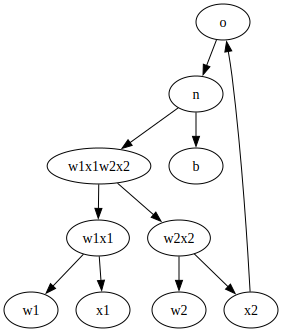

In [79]:
from graphviz import Digraph
g = Digraph(format="svg")
for node in output:
    for nei in output[node]:
        g.edge(node, nei)

g

In [ ]:
neuron = {
    o: {op: 'tanh', oprands: [n], label: 'o'},
    n: {op: '+', oprands: [w1x1w2x2, b], label: 'n'},
    w1x1w2x2: {op: '+', oprands: [w1x1, w2x2], label: 'w1x1w2x2'}
    b: {op: '', oprands: [], label: 'b'}
    w1x1: {op: '*', oprands: [w1, x1], label: 'w1x1'}
    w2x2: {op: '*', oprands: [w2, x2], label: 'w2x2'}
    w1: {op: '', oprands: [], label: 'w1'}
    x1: {op: '', oprands: [], label: 'x1'}
    w2: {op: '', oprands: [], label: 'w2'}
    x2: {op: '', oprands: [], label: 'x2'}
}

In [58]:
#use some common python to represent graph:

# adjacency lists 
# adjacency matrices(2d arrays)
# dictionary 

# things has relationship with each other, the relationship is edges, the things are vertices or nodes



graph1 = {
    'A': [],
}

xzzzzzzzzzzzzzzzzzzzz = {
    'A': ['B', 'C'],
    'B': [],
    'C': [],
}

# graph3= {'A': {'B': {}, 'C': {}}
graph3 = {
    'A': {'B': {}, 'C': {}}
}

topo = [] 
# graph1 output [A]
# graph2 output [B, C, A]
# graph3 output [B, C, A]

def build_topo(g, n):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g[n]:
        print("child is: ", child)
        build_topo(graph, child)
    # once build child, add n into topo list 
    topo.append(n)


def build_topo1(g):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g:
        print("child is: ", child)
        build_topo1(child)
    # once build child, add n into topo list 
    topo.append(g)

# start topological sort, start with node 'A'
build_topo1(graph3)


# graph2 = {
#     'A': ['B', 'C', 'E'],
#     'B': ['D', 'E'],
#     'C': [],
#     'D': [],
#     'E': [],
# }

topo


child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
# traverse the graph o 



In [ ]:
# vitulize the graph o 

In [87]:
result = (3**0.0001 - 1) / 0.0001
result

1.0986726383266365

In [ ]:
# array 

1. 1. Two Sum

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]
Example 3:

Input: nums = [3,3], target = 6
Output: [0,1]
 

Constraints:

2 <= nums.length <= 104
-109 <= nums[i] <= 109
-109 <= target <= 109
Only one valid answer exists.
 

Follow-up: Can you come up with an algorithm that is less than O(n2) time complexity?
        

In [14]:
# practice 1

# Input: nums = [2,7,11,15], target = 9
# Output: [0,1]
# Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
# Example 2:


nums = [2,7,11,15]
target = 9

# brute force, 
# time o2, outer n, innner n-1 + n-2 + n-3 +.... +1 = n(n-1)/2, total n-1 times, average n/2, total n*n/2, grow on the order of n^2
# space o1, traverse and indexing doesn't allocate new memory 
def twoSum(nums):
    n = len(nums)
    for i in range(n):
        for j in range(i+1, n):
            if nums[i] + nums[j] == target:
                return [i, j]

result = twoSum(nums);
print(result)

[0, 1]


In [37]:
def twoSum(nums, target):
    seen = {} 
    for i, x in enumerate(nums):
        comp = target - x
        if comp in seen:
            return [seen[comp], i]
        #  seen[x] = i not  seen[x]: i
        seen[x] = i
    return None

nums = [2,7,11,15]
target = 9
print(target)
twoSum(nums, target)
# print(result)

# have no clue hwo to fix 
# TypeError: twoSum() missing 1 required positional argument: 'target'

9


[0, 1]

In [20]:
# practive on

[0, 1]


In [17]:
# look for pair number from unseen numbers, current number right side 

from typing import List

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # i = 0
        # j = 1
        # for i=0, i<=nums.len i++:
        #     if (nums[i] + nums[j]) == target:
        #         return [i, j]
        #     j++
        n = len(nums)
        for i in range(n): 
            for j in range(i+1, n):
                if nums[i] + nums[j] == target:
                    return [i, j]
        return []

# how to iterate through a list of numbers with index?
# how to compare two number values equals to each other 
# 
# The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and ends at a specified number.
# however it is possible to specify the starting value by adding a parameter: range(2, 6), which means values from 2 to 6 (but not including 6):

        

nums = [2,7,11,15]
target = 9
s = Solution()

result = s.twoSum(nums, target)
result 

[0, 1]

brute force approach analyze:(self)
time complexity, O(n^2), 
traverse array one on top another, each char compare to each every other char, each char use i to index, that is O(n), 
every other char is loop through another array, that's O(n), so O(n)*O(n) is O(n^2)

space, O(n), 
len(array), only access the object stored integer value
traverse array does not allocate new memory, 
indexing only create a new char object, very small

brute force approach analyze:
time complexity, O(n^2), 
outer loop runs n times,
inner loop runs (n-1)*(n-2)*(n-3)*(n-4)*....*1 = n!/n (WRONG)
(n-1) + (n-2) + (n-3)+ ... + 1 = n(n-1)/2 (see below for details)
say we find the pair, the worst case at the very end of the array [2,7,11,15]
so we totally did total n + n(n-1)/2 operations, which is n(n+1)/2 operations, the operations grow on the order of n^2
(keep the highest-degree term, drop constants and smaller terms when describing growth.)

space, O(n), 
len(array), only access the object stored integer value
traverse array does not allocate new memory, 
indexing only create a new char object, very small

In [ ]:
factorial, non-negative integer n, denoted by n!, is the product of all possible integers less than or equal to n
1*2*3*4*....n = n!

fibonacci sequence, fn = fn-1 + fn-2, (f0= 1, f1 =1)
1, 1, 2, 3, 4, 5...n

sum of n non-negative integeter series:
1+2+3+4+5+...n , Sum = n+(n-1)+(n-2)+(n-3) + .... +2+1 
                     = n + (n + n + n + ...)+(-1 + -2 + -3 +.... -n)
                     = n + n*n - Sum
                2Sum = n(n+1)
                 Sum = n(n+1)/2
                 
sum of innner loop, for two sum brute foce, index j moved 
                 Sum = (n-1) + (n-2) + (n-3)+ ... + 1 
                     = n(n+1)/2 - n 
                     = n(n-1)/2      

In [ ]:
# a better way, to iterate only once, and find the two index of two number sum is target 
Still compare all pairs, but instead of iterating, change to searching 
one way current number compare to all unvisited right side, 
The other way compare current number to all visited number form left side  
Switch from iterating O(n) to searching  O(1), take advantage of of hash map 

target: 13
input nums: [2, 7, 5, 9]

map{}
i: 0, num: 2, look targe - current = 13-2 = 11, map[11], not find continue 

add i, num, into map {2: 0, }
i: 1, num: 7, look t-c = 13-7 = 5, map[5], not exist, continue 

update map {2: 0, 7: 1}
i: 2, num: 5, look t-c = 13-5 = 7, map[7], exit, return [i, map[7]]



The idea of using a hash map for optimization is very common in problems where you need to keep track of information you’ve already seen 
(like in Two Sum, finding pairs, or solving problems involving counting frequencies).

It becomes intuitive over time: Once you solve a few problems with hash maps, 
the idea of using them for “search-as-you-go” becomes second nature.


In [31]:
nums = [2,7,11,15]
target = 9

# for quick lookup, seen number and index, 2: 0


seen = {}
def twoSum(nums):
    for i, x in enumerate(nums):
        comp = target - x
        if comp in seen:
            return [seen[comp], i]
        # store current value into seen, not complement 
        seen[x] = i 
    return None
        
# don't reply on globals, pass target, and keep seen inside the function, so repeated call don't leak state.
result = twoSum(nums);
print(result)

# how to add element into dict?
# in js use None

# list, dict, set, add new element 
# list.append("a")
# dict["a"] = "b"
# set.add("a")

[0, 1]


In [61]:
# two sum use hashmap or hashtable 

nums = [2,7,11,15]
target = 9

# for quick lookup, seen number and index, 2: 0
def twoSum(nums, target):
    seen = {}
    for i, x in enumerate(nums):
        comp = target - x
        if comp in seen:
            return [seen[comp], i]
        # store current value into seen, not complement 
        seen[x] = i 
    return None
        
# don't reply on globals,pass target, and keep seen inside the function, so repeated call don't leak state.
result = twoSum(nums, target);
print(result)

# how to add element into dict?
# in js use None

# list, dict, set, add new element 
# list.append("a")
# dict["a"] = "b"
# set.add("a")

[0, 1]


In [46]:
# enumerate python build in function

a = ['Geeks', 'for', 'Geeks']

# Creating an enumerate object from the list 'a' 
b = enumerate(a)

# This retrieves the first index-element pair from 'b'
nxt_val = next(b)
print(nxt_val)
nxt_val1 = next(b)
print(nxt_val1)

(0, 'Geeks')
(1, 'for')


In [55]:
nums = [2, 3, 5, 1, 0]
target = 6
def twoSum(nums, target):
    # i as frist number address
    # j as second number address 
    # i and j are different number 
    n = len(nums)
    js = {}
    # 2:0, 3:1 ... 0: 4
    # for i in range(n):
    #     for j in range(i+1, n):
    #         if (nums[i] + nums[j] == target):
    #             return [i, j]
    for i in range(n):
        j = target - nums[i]
        # j is the value, stored on memory as well 
        if (j in js):
            # j is the address or location, key, which stored in disctionary 
            return [i, js[j]]
        js[nums[i]] = i

twoSum(nums, target)

# step1: solve the every two nums compare first, 
# step2: then add condition, while comparing, if find sum == target, return 

[3, 2]

In [ ]:
def twoSum(nums, target):
    need = {}                      # need[value_we_want] = index_that_wants_it
    for i, x in enumerate(nums):
        if x in need:              # current value satisfies someone’s need
            return [need[x], i]
        need[target - x] = i       # now we need (target - x) later


In [52]:
# how to define dict, and add and update dict?

d = {}
d[0] = 2
d["a"] = "b"
if (0 in d):
    print(d[0])

print(d)

2
{0: 2, 'a': 'b'}


# Why 0-based?

Pointer/offset math is simpler.
In memory, an array is a block starting at some base address B.
The i-th element lives at <font color = 'red'>B + i * sizeof(elem).</font>
If indexes started at 1, you’d need B + (i-1) * sizeof(elem) everywhere—an extra subtraction for every access.

# why array is 0 to n-1, not 1 to n

---

## 1. Arrays = continuous memory

An array is just a block of memory cells, each the same size.
If the array starts at memory address `BASE`, then:

* The **0th element** is at `BASE + 0 * SIZE`.
* The **1st element** is at `BASE + 1 * SIZE`.
* The **kth element** is at `BASE + k * SIZE`.

So the index is literally the *offset* (how many steps from the start).

👉 That’s why arrays in almost every low-level language (C, assembly, machine code) start at **0**. The very first cell is `0` steps away from the base.

---

## 2. Why not start at 1?

If we started at 1, then:

* The formula would become `BASE + (i-1) * SIZE`.
* Every access needs a **subtraction** before multiplying.
* That’s an extra operation the CPU has to do billions of times.

So starting from 0 is cleaner, faster, and matches the natural offset math.

---

## 3. Why up to `len-1`?

If the array has length `n`:

* The valid offsets are `0, 1, 2, …, n-1`.
* `n-1` steps from the base lands on the **last cell**.
* `n` would mean “1 past the end,” which is invalid.

That’s why the index range is `[0, n-1]`.

---

## 4. Why do some languages (like Fortran, MATLAB) start at 1?

* **Math tradition**: Mathematicians write sequences as `a₁, a₂, …, aₙ`.
* These languages wanted to be closer to math notation.
* But under the hood, they still do `i-1` when mapping to memory.

So it’s a design choice:

* **Performance + offset math → start at 0** (C, Java, Python).
* **Human/mathematical convenience → start at 1** (Fortran, MATLAB, Lua).

---

## 5. Big picture

* Index = **offset from base**.
* `0` → no offset.
* `len-1` → last valid offset.
* It’s not arbitrary — it comes straight from how memory addressing works.

---

👉 So fundamentally: **0-based indexing matches memory layout**. 1-based indexing is possible, but it’s a layer of convenience that adds an extra subtraction behind the scenes.

---

Do you want me to also show you a **memory diagram** (boxes with addresses and indexes) so you can *see* why `0` makes sense?


Algorithm Explanation:
The solution uses a hash map (dictionary) approach with a single pass through the array:

Iterate through the array once, examining each number and its index
Calculate the complement - what number we need to find to reach the target (target - current_number)
Check if the complement exists in our hash map from previous iterations
If found: return the indices of both numbers
If not found: store the current number and its index for future lookups

Why This Works:

Time Complexity: O(n) - single pass through the array
Space Complexity: O(n) - hash map storage in worst case
Efficiency: Much better than the brute force O(n²) approach of checking every pair

Key Insights:

We don't need to store all numbers first - we can check for complements as we go
The hash map lookup is O(1) average case
Since we're guaranteed exactly one solution exists, we don't need to handle edge cases for no solution
The algorithm naturally avoids using the same element twice since we check the hash map before adding the current element

This solution handles all the constraints: finds exactly one solution, doesn't reuse elements, and can return indices in any order.

In [ ]:
# two sum use two pointers  not good

nums = [2,7,11,15]
target = 9
def twoSum(nums, target):

# for quick lookup, seen number and index, 2: 0



def twoSum(nums, target):
    
        
# don't reply on globals,pass target, and keep seen inside the function, so repeated call don't leak state.
result = twoSum(nums, target);
print(result)

In [66]:
# 167. Two Sum II - Input Array Is Sorted

class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        l, r = 0, len(numbers) - 1
        while (l < r):
            if (numbers[l] + numbers[r] == target):
                return [l+1, r+1]
            if (numbers[l] + numbers[r] > target):
                 r-=1
            if (numbers[l] + numbers[r] < target):
                l+=1
           
        return None
        
# ------
def twoSum(numbers: List[int], target: int) -> List[int]:
        l, r = 0, len(numbers) - 1
        while (l < r):
            s = numbers[l] + numbers[r]
            if ( s == target):
                return [l+1, r+1]  # 1-indexed per problem
            elif ( s > target):
                 r-=1
            else :
                l+=1
        raise ValueError("No solution found")

numbers = [2,7,11,15]
target = 9
print(twoSum(numbers, target))

[1, 2]


In [ ]:
15. 3Sum
Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] 
such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
Example 2:

Input: nums = [0,1,1]
Output: []
Explanation: The only possible triplet does not sum up to 0.
Example 3:

Input: nums = [0,0,0]
Output: [[0,0,0]]
Explanation: The only possible triplet sums up to 0.
 

Constraints:

3 <= nums.length <= 3000
-105 <= nums[i] <= 105

In [67]:
# self try 1
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        result = []
        n = len(nums)
        for i in range(n):
            for j in range(i+1, n):
                for k in range(j+1, n):
                    if nums[i] + nums[j] + nums[k] == 0:
                        result.append([nums[i], nums[j], nums[k]])
        return result 

nums = [-1,0,1,2,-1,-4]
Output = [[-1,-1,2],[-1,0,1]]

s = Solution()
print(s.threeSum(nums))

[[-1, 0, 1], [-1, 2, -1], [0, 1, -1]]


In [122]:
# correct one brute force
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        uniqResult = set()
        n = len(nums)
        for i in range(n):
            for j in range(i+1, n):
                for k in range(j+1, n):
                    if nums[i] + nums[j] + nums[k] == 0:
                        sortedHashableNums = tuple(sorted([nums[i], nums[j], nums[k]]))
                        uniqResult.add(sortedHashableNums)
        return [list(nums) for nums in uniqResult]

nums = [-1,0,1,2,-1,-4]
Output = [[-1,-1,2],[-1,0,1]]

s = Solution()
print(s.threeSum(nums))

# how to sort an array of numbers? use sorted 
# what is the cost of sort array of number in python? log N? 

#big O, N3, and n. NO, don't understand why n

* Your brute-force version is **functionally correct** and dedups by storing each triplet as a **sorted `tuple`** in a `set`.
* **Time:** $O(n^3)$. The inner work is constant time (sorting 3 numbers is $O(1)$; hashing/inserting a 3-tuple is amortized $O(1)$).
* **Space:** $O(U)$ for the set of unique triplets, where $U$ is the number of distinct zero-sum triplets. In the worst case $U=\Theta(n^2)$ (there are $O(n^2)$ pairs $(i,j)$, each determines at most one $k$), so **worst-case space is $O(n^2)$**, not $O(n)$. Plus $O(U)$ for the returned list.

If you want the standard optimal approach (and to avoid the heavy $n^3$ work), use sort + two pointers:


[[-1, 0, 1], [-1, -1, 2]]


In [7]:
# optimized, sort and two pointers
# setp1, display all possible 3 numbers from this array or list of numbers use i, l, r, 
# len, target, relationship, sNums
# step2, no dup sorted array, i loop, two sum of sorted nums, use two pointer 
# step3, with dup, add process to remove dups 

class Solution:
    def threeSum(self, nums):
        result = []
        n = len(nums)
        # nlog(n)
        sNums = sorted(nums)
        # [1, 1, 1, 1, 5, 5] 7

    
        for i in range(n - 2):

            # learn hwo to use break keyword in python
            if sNums[i] > 0:
                break;
            
            if (i>0 and sNums[i-1]==sNums[i]):
                continue
            l, r = i+1, n-1
            while(l < r):
                if (sNums[l] + sNums[r] == -sNums[i]):
                    result.append([sNums[l],sNums[r], sNums[i]])
                    # why need to skip once?????
                    l += 1; r -= 1 
                    while (l < r and sNums[r] == sNums[r-1]):
                        r-=1
                    while (l < r and sNums[l] == sNums[l+1]):
                        l+=1
                elif(sNums[l] + sNums[r] > -sNums[i]):
                    r-=1
                else: 
                    l+=1
 
        return result
            

nums = [-1,-1, -1,0,1,2,-1,-4]
Output = [[-1,-1,2],[-1,0,1]]

nums1 = [-1,0,1,2,-4]

s = Solution()
print(s.threeSum(nums1))

[[0, 1, -1]]


In [4]:
# test skip duplicates i, keep the last num, use continue to skip certain loop operations
sNums = [1, 1, 1, 3, 3, 4, 5, 5] 
target = 7
n = len(sNums)
for i in range(n):
    if (i+1 < n and sNums[i+1] == sNums[i]):
        continue
    print(i);
    

# for loop is keep moving forward, each time inside can do many things, then i +=1
# to skip certain inside, use continue, directly i+=1
# to completely stop the loop, jump out, use break
    

2
4
5
7


In [3]:
# test skip duplicates i, keep the first num, use continue to skip certain loop operations, better!
sNums = [1, 1, 1, 3, 3, 4, 5, 5] 
target = 7
n = len(sNums)
for i in range(n):
    if (i>0 and sNums[i-1] == sNums[i]):
        continue
    print(i);

0
3
5
6


In [17]:
# setp1, display all possible 3 group numbers(each use once) from this array or list of numbers use i, l, r, 
# measure it use len, target, relationship, sNums (sorted use l and r, unsorted use j, k)
# step2, no dup sorted array, i loop, two sum of sorted nums, use two pointer 
# step3, with dup, add process to remove dups 
sNums = [-1,0,1,2,-1,-4]
target = 0
result = []
n = len(sNums)
for i in range(n):
    l, r = i+1, n-1
    while(l < r):
        if (sNums[l] + sNums[r] + sNums[i] == target):
            result.append([sNums[l], sNums[r], sNums[i]])
        print(i, l, r, [sNums[i], sNums[l], sNums[r]])
        l+=1
        r-=1
print(result)

0 1 5 [-1, 0, -4]
0 2 4 [-1, 1, -1]
1 2 5 [0, 1, -4]
1 3 4 [0, 2, -1]
2 3 5 [1, 2, -4]
3 4 5 [2, -1, -4]
[]


In [20]:
# start with sorted nums, no duplicates, two sum, two pointer, store no duplicate two sum = target

nums = [1, 2, 3, 4, 5]
target = 6
result = []
n = len(nums)
for i in range(n):
    l, r = 0, n-1
    if (nums[l] + nums[r] == target):
        result.append([nums[l], nums[r]])
        l+=1
        r-=1
print(result)
# [[1, 5], [1, 5], [1, 5], [1, 5], [1, 5]]

# i love this mistake, what is your i used for here? what is your goal here? only track two nums, i is useless!!!
    

[[1, 5], [1, 5], [1, 5], [1, 5], [1, 5]]


In [23]:
# two sum, two pointer, l, r, sorted, no duplicate, while
nums = [1, 2, 3, 4, 5]
target = 6
result = []
n = len(nums)
l, r = 0, n-1
while(l < r):
    if (nums[l] + nums[r] == target):
        result.append([nums[l], nums[r]])
        l+=1
        r-=1
    elif(nums[l] + nums[r] > target):
        r-=1
    else:
        l+=1

print(result)

1 3
2 2
[[1, 5], [2, 4]]


In [26]:
# two sum, two pointer, l, r, sorted, with duplicate, while
nums = [1, 1, 2, 3, 4, 5, 5]
target = 6
result = []
n = len(nums)
l, r = 0, n-1
while(l < r):
    if (nums[l] + nums[r] == target):
        result.append([nums[l], nums[r]])
        while (l+1 < n and nums[l+1] == nums[l]): l+=1
        while (r-1 > 0 and nums[r-1] == nums[r]): r-=1
        l+=1
        r-=1
    elif(nums[l] + nums[r] > target):
        r-=1
    else:
        l+=1

print(result)

[[1, 5], [2, 4]]


In [32]:
# do not use if then i++ or while then i++ inside of for loop, use continue to skip rest operations
nums = [1, 1, 2, 3, 4, 4, 5, 5]
t = 7
result = []
n = len(nums)
for i in range (n):
    # while(i-1 >0 and nums[i-1] == nums[i]): i+=1
    if(i-1 >0 and nums[i-1] == nums[i]): 
        # i+=1
        continue
    target = t - nums[i]
    l, r = i+1, n-1
    while(l < r):
        if (nums[l] + nums[r] == target):
            result.append([nums[l], nums[r], nums[i]])
            l+=1
            r-=1
            while (l+1 < n and nums[l+1] == nums[l]): l+=1
            while (r-1 > 0 and nums[r-1] == nums[r]): r-=1
          
        elif(nums[l] + nums[r] > target):
            r-=1
        else:
            l+=1

print(result)

[[1, 5, 1], [2, 4, 1], [2, 4, 1]]


In [34]:
nums = [1, 1, 2, 3, 4, 4, 5, 5]
t = 7
result = []
n = len(nums)
for i in range (n):
    if(i-1 >= 0 and nums[i-1] == nums[i]): 
        continue
    target = t - nums[i]
    l, r = i+1, n-1
    while(l < r):
        s = nums[l] + nums[r]
        if ( s == target):
            result.append([nums[l], nums[r], nums[i]])
            l+=1
            r-=1
            while (l < r and nums[l+1] == nums[l]): 
                l+=1
            while (l<r and nums[r-1] == nums[r]): 
                r-=1
          
        elif(s > target):
            r-=1
        else:
            l+=1

print(result)

[[1, 5, 1], [2, 4, 1]]


In [ ]:
from typing import List

class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        sNums = sorted(nums)
        n = len(sNums)
        result: List[List[int]] = []

        for i in range(n - 2):
            if i > 0 and sNums[i] == sNums[i - 1]:
                continue                 # skip duplicate anchors
            if sNums[i] > 0:
                break                    # nothing beyond can sum to 0

            l, r = i + 1, n - 1
            while l < r:
                s = sNums[i] + sNums[l] + sNums[r]
                if s == 0:
                    result.append([sNums[i], sNums[l], sNums[r]])
                    l += 1; r -= 1       # move once, THEN skip dups
                    while l < r and sNums[l] == sNums[l - 1]:
                        l += 1
                    while l < r and sNums[r] == sNums[r + 1]:
                        r -= 1
                elif s < 0:
                    l += 1
                else:
                    r -= 1
        return result


In [ ]:
nums = [1, 1, 2, 3, 4, 4, 5, 5]
t = 7
result = []

nums.sort()
n = len(nums)

for i in range(n - 2):
    if i > 0 and nums[i] == nums[i - 1]:
        continue                      # skip duplicate anchors

    target = t - nums[i]
    l, r = i + 1, n - 1
    while l < r:
        s = nums[l] + nums[r]
        if s == target:
            result.append([nums[i], nums[l], nums[r]])
            l += 1; r -= 1            # move once...
            while l < r and nums[l] == nums[l - 1]:
                l += 1                # ...then skip dup L
            while l < r and nums[r] == nums[r + 1]:
                r -= 1                # ...then skip dup R
        elif s < target:
            l += 1
        else:
            r -= 1

print(result)  # -> [[1, 1, 5], [1, 2, 4]]


Here’s a clean, accepted 3-Sum solution using **sort + two pointers** (no duplicates):

```python
from typing import List

class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        res: List[List[int]] = []
        n = len(nums)

        for i in range(n - 2):
            if i > 0 and nums[i] == nums[i - 1]:
                continue              # skip duplicate anchors
            if nums[i] > 0:
                break                 # no triplet can sum to 0 beyond this

            l, r = i + 1, n - 1
            while l < r:
                s = nums[i] + nums[l] + nums[r]
                if s == 0:
                    res.append([nums[i], nums[l], nums[r]])
                    l += 1; r -= 1    # move once, then skip duplicates
                    while l < r and nums[l] == nums[l - 1]:
                        l += 1
                    while l < r and nums[r] == nums[r + 1]:
                        r -= 1
                elif s < 0:
                    l += 1
                else:
                    r -= 1
        return res
```

### Why this works

* Sort so increasing/decreasing sums are predictable.
* For each anchor `i`, use two pointers `l` and `r` to find pairs summing to `-nums[i]`.
* Skip duplicates at the anchor and after each found triplet to ensure **unique** results.

### Example run (your input)

`nums = [-1,0,1,2,-1,-4] → sorted = [-4,-1,-1,0,1,2]`

* `i=1 (−1)`: find `[-1, -1, 2]` and `[-1, 0, 1]`
* Others produce no new unique triplets
  → `[[−1,−1,2],[−1,0,1]]` (order may vary)

### Complexity

* **Time:** $O(n^2)$ (sort $O(n\log n)$ + two-pointer scan)
* **Space:** $O(1)$ extra (besides the output)

> Tip: If you must keep the original array unchanged, use `sNums = sorted(nums)` and reference `sNums` everywhere instead of sorting in place.





The runtime is the **sum** of two phases, not a product:

1. **Sort once:** $O(n\log n)$
2. **Two-pointer scans across all anchors:** $O(n^2)$

Total: $O(n\log n + n^2) = O(n^2)$ (the $n^2$ term dominates).

Why the inner part is $O(n^2)$, not $O(n^3)$: for each anchor $i$, the two pointers $l$ and $r$ **move inward at most $n$ steps total** (each step increments $l$ or decrements $r$). Summed over all $i$, that’s $O(n^2)$, not $n$ (outer) × $n$ (left) × $n$ (right).


# why can not do if then i++, or while then i++ inside of for loop? 

Great question! The short version:

* In `for i in range(n)`, **`i` is controlled by the iterator** (`range`).
  On each iteration, Python **rebinds** `i` to the next value from `range`, *ignoring* any `i += 1` you did inside the loop.
* So doing `i += 1` (or a `while ...: i += 1`) **does not change which `i` comes next**. Use `continue` to skip the rest of the *current* iteration and let the `for` naturally move to the next item.

### Tiny demo

```python
for i in range(5):
    if i == 1:
        i = 99
    print(i)
```

Output:

```
0
99   # changed only for THIS iteration
2    # next value still comes from range -> 2, 3, 4
3
4
```

See how setting `i=99` didn’t affect the sequence of `i` values the loop iterates?

### What to do instead

#### A) Keep `for`, just skip this anchor

```python
for i in range(n - 2):
    if i > 0 and a[i] == a[i - 1]:
        continue  # skip duplicate anchor; next i comes from range
    # ... two-pointer work ...
```

#### B) If you really want to advance `i` manually, use `while`

When you need **full control** over how `i` increments (e.g., sometimes jump by more than 1), switch to a `while` loop:

```python
i = 0
while i < n - 2:
    if i > 0 and a[i] == a[i - 1]:
        i += 1         # manually move i and try again
        continue
    # ... two-pointer work ...
    i += 1             # normal step
```

### Why your `while (...): i += 1` inside `for` is risky

* It can move `i` *within the same iteration*, so you’ll compute with a mismatched anchor (`l, r = i+1, ...` might now be wrong).
* On the **next** iteration, `for` reassigns `i` from `range` anyway, so your manual increments don’t actually skip those indices in the outer loop.
* It can also cause boundary issues (e.g., checking `i+1` near the end).

So: with `for`, use `continue`. If you need custom index jumps, rewrite the outer loop as `while`.


# when to use for, when to use while loop, continue and break

Got you. Here’s a LeetCode-oriented cheat sheet for **for vs while** (plus how to use `break` / `continue`) with the most common patterns.

# When to use which

**Use `for` when** you know exactly how you’ll advance the index each step:

* Scan an array once
* Fixed “levels” inside BFS (use `for _ in range(len(q))`)
* Iterate a range, characters in a string, neighbors of a node
* “Sliding window” outer loop (often `for right in range(n)`)

**Use `while` when** the loop end is data-dependent:

* Two pointers that move unevenly (`l` and `r`)
* Shrinking/expanding windows (`while window_invalid: left += 1`)
* Binary search (`while lo <= hi`)
* BFS queue/stack until empty (`while q:`)
* Linked list traversal (`while node:`)

---

# Canonical patterns (copy/paste friendly)

### 1) Plain array scan (for)

```python
for i, x in enumerate(nums):
    if bad(x): 
        continue
    if goal(x):
        return i
```

* `continue` skips unwanted cases; avoids nested `if`s.

### 2) Two pointers (while)

```python
l, r = 0, len(nums) - 1
while l < r:
    s = nums[l] + nums[r]
    if s == target:
        return [l, r]       # or record answer
    elif s < target:
        l += 1              # move the smaller side
    else:
        r -= 1
```

* Most common in **2-Sum sorted**, **3-Sum inner loop**, **Trapping Rain Water**, **Valid Palindrome**.

### 3) Sliding window (for + inner while)

```python
best = 0
count = collections.Counter()
left = 0
for right, x in enumerate(nums):
    count[x] += 1
    while window_invalid(count):
        count[nums[left]] -= 1
        left += 1
    best = max(best, right - left + 1)
```

* Outer `for` grows window; inner `while` shrinks until valid.
* Used for **Longest Substring Without Repeating**, **min window**, etc.

### 4) Binary search (while)

```python
lo, hi = 0, n - 1
while lo <= hi:
    mid = (lo + hi) // 2
    if ok(mid):
        hi = mid - 1        # or lo = mid + 1 depending on variant
    else:
        lo = mid + 1
return lo                   # or the last valid index
```

### 5) BFS level order (while + for)

```python
from collections import deque
q = deque([start])
dist = {start: 0}

while q:
    for _ in range(len(q)):        # fixes “level by level”
        u = q.popleft()
        for v in graph[u]:
            if v in dist: 
                continue
            dist[v] = dist[u] + 1
            q.append(v)
```

* `while q:` keeps going until queue empties; inner `for` processes one level.

### 6) Linked list traversal (while)

```python
cur = head
while cur:
    # work with cur
    cur = cur.next
```

### 7) 3-Sum (for anchor + while two-pointers)

```python
nums.sort()
res = []
n = len(nums)
for i in range(n - 2):
    if i > 0 and nums[i] == nums[i - 1]:
        continue
    if nums[i] > 0:
        break
    l, r = i + 1, n - 1
    while l < r:
        s = nums[i] + nums[l] + nums[r]
        if s == 0:
            res.append([nums[i], nums[l], nums[r]])
            l += 1; r -= 1
            while l < r and nums[l] == nums[l - 1]: l += 1
            while l < r and nums[r] == nums[r + 1]: r -= 1
        elif s < 0:
            l += 1
        else:
            r -= 1
```

---

# `break` vs `continue` – where they shine

* **`continue`**: skip to the next iteration early.

  * Skip duplicates: `if i>0 and a[i]==a[i-1]: continue`
  * Skip invalid inputs or filtered cases.

* **`break`**: stop the **current** loop immediately.

  * Monotonic cutoff: in sorted arrays, `if a[i] > target: break`
  * Found answer in search loop (when only one answer needed)
  * In nested loops, `break` stops only the **inner** loop (common pitfall).

### Python’s `for…else` (handy search idiom)

```python
for i in range(n):
    if found(i):
        break
else:
    # ran to completion without break
    return -1
```

---

# Common pitfalls (and fixes)

* **Modifying the `for` index inside the loop**: don’t. Use `continue` or restructure.
* **Infinite `while`**: always ensure the loop variables move in every branch.
* **Skipping pointer movement after finding a match** (two pointers): move once, then skip duplicates.
* **Off-by-one**: prefer `range(n)` / `range(n-1)` and `while l < r` templates.
* **Using `break` expecting it to exit all loops**: it exits only the current one—return or flag if you need to stop outer loops.

---

# Quick decision guide

* Just scan the array once? → **`for`**
* Need two pointers meeting in the middle? → **`while`**
* Window grow/shrink until a condition holds? → **`for` + inner `while`**
* Until the structure empties (queue/stack/heap)? → **`while`**
* Binary search / number of steps unknown in advance? → **`while`**
* Level-by-level graph/tree processing? → **`while` + `for _ in range(len(q))`**

If you want, toss me a specific problem you’re on and I’ll map it to the right loop template + edge cases.


# python sorted() vs .sort()


Yep—`sorted()` is a **built-in** Python function. Under the hood (CPython), it uses **Timsort**: a stable, adaptive, O(n log n) comparison sort optimized for real-world data.

# What `sorted()` does

* **Signature:** `sorted(iterable, *, key=None, reverse=False)`
* **Returns:** a **new list** with the items sorted.
* **Doesn’t mutate** the input iterable (unlike `list.sort()` which sorts in place).
* **Stable:** if two items compare equal (same key), their **original order** is preserved.

# How it works (in plain terms)

* **Timsort** detects already-sorted “runs” in your data, then merges them.
* On **nearly sorted data**, it can be close to **O(n)**.
* On arbitrary data, time is **O(n log n)**.
* Space: `sorted()` must build a new list (**O(n)**) plus temporary data for keys/merges.

# `key` and `reverse`

* `key` is a function applied **once per element** to produce a sort key.
* Python caches these keys internally (so your `key` isn’t recomputed repeatedly).
* `reverse=True` just flips the final order.

Examples:

```python
# Numeric ascending
sorted([3, 10, -2])                    # [-2, 3, 10]

# By length, then lexicographic (tuple key)
words = ["pear", "fig", "apple", "kiwi"]
sorted(words, key=lambda w: (len(w), w))  # ['fig', 'kiwi', 'pear', 'apple']

# Absolute value, descending
sorted([-5, -1, 2, 3], key=abs, reverse=True)  # [-5, 3, 2, -1]

# Sort list of dicts by multiple fields
people = [{"name":"Ann","age":30},{"name":"Bob","age":25},{"name":"Bob","age":20}]
sorted(people, key=lambda p: (p["name"], p["age"]))
# [{'name':'Ann','age':30}, {'name':'Bob','age':20}, {'name':'Bob','age':25}]
```

# `sorted()` vs `.sort()`

* `sorted(iterable, ...)` → returns a **new list**.
* `some_list.sort(...)` → **in-place**, returns **None** (faster if you can mutate).

# Common gotchas

* Sorting **dicts**: `sorted(d)` sorts **keys**. Use `sorted(d.items())` to sort by key/value pairs.
* Sorting **sets**: order is arbitrary; `sorted(my_set)` returns a list in sorted order.
* **Mixed incomparable types** (e.g., `3` and `"3"`) can’t be compared in Python 3 → `TypeError`.
* If you need a **custom order** (e.g., a specific ranking), map to a key:

  ```python
  order = {"high": 0, "med": 1, "low": 2}
  sorted(["low","high","med","high"], key=order.get)
  ```

# Custom objects

Provide `__lt__(self, other)` (the “less-than” method) or just give a `key`:

```python
class Point:
    def __init__(self, x, y): self.x, self.y = x, y

pts = [Point(1,2), Point(0,5), Point(1,1)]
sorted_pts = sorted(pts, key=lambda p: (p.x, p.y))  # by x then y
```

That’s the gist: **built-in**, **stable Timsort**, **key-based**, **O(n log n)**, returns a **new list**.


In [78]:
# test
numsList = [[-1, 0, 1], [-1, 2, -1], [0, 1, -1]]
# for nums in numsList:
#     print(sorted(nums))
#
# how to eliminate duplicate array nums? use hash map, store them into tuple data type, so its immutable, 
# which is hashable, can store into hash table or hash map 
# for nums in numsList:
#     print(tuple(sorted(nums)))

# uniq = set()
# for nums in numsList:
#     uniq.add(tuple(sorted(nums)))

# print(uniq)

# how to transform from set to list?
listResult = []
for eachTuple in uniq:
    listResult.append(eachTuple)

print(listResult)


[(-1, 0, 1), (-1, -1, 2)]


In [ ]:
# use fancy python, haha, comprehensions, compact syntax to build containers 

numsList = [[-1, 0, 1], [-1, 2, -1], [0, 1, -1]]

# dedupe: sort each triplet → tuple → set
uniq = {tuple(sorted(triplet)) for triplet in numsList}

# back to list of lists (optionally sort for stable output)
listResult = [list(t) for t in sorted(uniq)]
print(listResult)  # [[-1, -1, 2], [-1, 0, 1]]


In [117]:
# try myself, hahahaha, wrong but fun 

numsList = [[-1, 0, 1], [-1, 2, -1], [0, 1, -1]]

sortedNumsList = [sorted(result) for nums in numsList]

numsTuple = tuple((sorted(result)) for nums in numsList)

print(sortedNumsList)
print(numsTuple)

# 

[[0, 1], [0, 1], [0, 1]]
([0, 1], [0, 1], [0, 1])


In [ ]:
You’re super close—you just mixed up the variable name and the comprehension syntax.

In [99]:
# create a tuple of list of numbers, syntax as: ([1,2, 3],[2, 3, 4]) or {[1,2, 3],[2, 3, 4]}
# create a tuple of list of numbers from a list of numbers, syntax as [[1,2, 3],[2, 3, 4]]
# the comprehension function syntax is:
numsList = [[-1, 0, 1], [-1, 2, -1], [0, 1, -1]]
tupleOfList = tuple(nums for nums in numsList)
# or 
tupleOfList1 = tuple(numsList)

print(tupleOfList)
print(tupleOfList1)

# the tuple of list of numbers still mutable, I thought tuple suppose to be immutable?
numsList[0][0] = 90
print(tupleOfList)

# only one layer is immutable, but not the inside layer 
numsList[0] = [88, 88]
print(tupleOfList)
print(numsList)

# to make the inside immutable as well?
# but to hash it only need one layer immutable is good? or need inside layer as well?

# what is this?
tupleOfList2 = tuple(tuple(nums) for nums in numsList)
print(tupleOfList2)
numsList[0][0] = 90
print(tupleOfList2)

([-1, 0, 1], [-1, 2, -1], [0, 1, -1])
([-1, 0, 1], [-1, 2, -1], [0, 1, -1])
([90, 0, 1], [-1, 2, -1], [0, 1, -1])
([90, 0, 1], [-1, 2, -1], [0, 1, -1])
[[88, 88], [-1, 2, -1], [0, 1, -1]]
((88, 88), (-1, 2, -1), (0, 1, -1))
((88, 88), (-1, 2, -1), (0, 1, -1))


In [111]:
# list of nums, find unique list of nums
# iterate each nums in the list, sort each one, convert each nums to tuple, then last convert tuple list into set

numsList = [-1, 0, 1], [-1, 2, -1], [0, 1, -1]

deepTupleOfList = tuple(tuple(nums) for nums in numsList)

tupleOfsortedList =  tuple(sorted(nums) for nums in numsList)

# you can not create set with many items at once, it has to be added one by one 
# yes you can, make sure all elements are hashable, not just one layer is tuple
nonDuphashTupleOfSortedList = set(tuple(sorted(nums)) for nums in numsList)
# or 
nonDuphashTupleOfSortedList1 = {tuple(sorted(nums)) for nums in numsList}


print(deepTupleOfList)
print(tupleOfsortedList)
print(hashTupleOfSortedList)
print(nonDuphashTupleOfSortedList1)

((-1, 0, 1), (-1, 2, -1), (0, 1, -1))
([-1, 0, 1], [-1, -1, 2], [-1, 0, 1])
{(-1, 0, 1), (-1, -1, 2)}
{(-1, 0, 1), (-1, -1, 2)}
{(-1, 0, 1), (-1, -1, 2)}


In [112]:
# remove duplicate nums list from list of nums list 

numsList = [[-1, 0, 1], [-1, 2, -1], [0, 1, -1]]

uniqList = {tuple(sorted(nums)) for nums in numsList}

print(uniqList)

{(-1, 0, 1), (-1, -1, 2)}


# python list, set, tuple, dict convert from one to another

hashtable, set and dict, {}
dynamic array, list []
static array, tuple, (), empty set, set()

sorted(nums) returns a list (unhashable).

A set can only hold hashable elements.

A tuple is hashable only if all its elements are hashable—yours weren’t (they were lists).



Here’s a compact “conversion cheat-sheet” for Python’s core containers:

# General rule

Use the type’s constructor on an **iterable**:

* `list(iterable)`
* `set(iterable)`
* `tuple(iterable)`
* `dict(iterable_of_pairs)` or `dict.fromkeys(iterable, value)`

---

# List ↔ Set ↔ Tuple

```python
lst = [1, 2, 2, 3]
st  = {1, 2, 3}
tpl = (1, 2, 3)

# list → set (dedup; order lost)
set_from_list = set(lst)               # {1, 2, 3}

# set → list/tuple (order arbitrary; sort if needed)
list_from_set  = list(st)              # e.g. [1, 3, 2]
tuple_from_set = tuple(st)             # e.g. (1, 3, 2)

# list ↔ tuple (order preserved)
tuple_from_list = tuple(lst)           # (1, 2, 2, 3)
list_from_tuple = list(tpl)            # [1, 2, 3]

# Dedup while keeping first-seen order
unique_list = list(dict.fromkeys(lst)) # [1, 2, 3]
```

---

# Dict ↔ others

**Important:** Iterating a dict yields **keys** by default.

```python
d = {"a": 1, "b": 2, "c": 2}

# dict → list / set / tuple (of KEYS)
list_keys  = list(d)                   # ["a", "b", "c"]
set_keys   = set(d)                    # {"a", "b", "c"}
tuple_keys = tuple(d)                  # ("a", "b", "c")

# dict → items / values
list_items  = list(d.items())          # [("a",1), ("b",2), ("c",2)]
set_items   = set(d.items())           # {("a",1), ("b",2), ("c",2)}  # tuples are hashable
list_values = list(d.values())         # [1, 2, 2]
set_values  = set(d.values())          # {1, 2}

# list/tuple of pairs → dict
pairs = [("a",1), ("b",2), ("c",2)]
dict_from_pairs = dict(pairs)          # {"a":1, "b":2, "c":2}

# list/tuple of keys → dict with a default value
keys = ["a", "b", "c"]
dict_from_keys = dict.fromkeys(keys, 0)  # {"a":0, "b":0, "c":0}
```

---

# Hashability gotchas

* **Sets** and **dict keys** require **hashable** elements (e.g., `int`, `str`, **tuple of hashables**).
  Unhashable: `list`, `dict`, `set`, or a tuple that **contains** them.
* Example:

  ```python
  set([ (1,2), (3,4) ])        # OK
  set([ [1,2], [3,4] ])        # TypeError: unhashable type: 'list'
  ```

---

# Deterministic order

* **dicts** preserve **insertion order** (Python 3.7+).
* **sets** are unordered; for stable output use `sorted(...)`:

  ```python
  sorted_list_from_set = sorted(st)    # [1, 2, 3]
  ```

That’s 95% of everyday conversions. If you’ve got a specific structure (e.g., list of dicts, nested containers), toss it here and I’ll show the exact one-liners.


In [121]:
# try myself, hahah

setOftuple = {(-1,-1,2),(-1,0,1)}
listOfList = [list(nums) for nums in setOftuple]

print(listOfList)

[[-1, 0, 1], [-1, -1, 2]]


# python set, list, dict, tuple, symbols, initilization, comprehension

Totally fair to be confused—Python’s brackets are fussy. Here’s the clean map:

### What brackets mean in Python

* **List** → `[...]`
  Examples: `[1, 2, 3]`, `[]`

* **Tuple** → commas define the tuple; parentheses are optional for non-empty
  Examples: `(1, 2, 3)`, `1, 2, 3` (also a tuple), **single-item**: `(1,)` or `1,`
  Empty tuple: `()`

* **Set** → `{...}` **only when it’s not key\:value**
  Examples: `{1, 2, 3}`
  **Empty set:** `set()` (because `{}` is a dict)

* **Dict** → `{key: value, ...}`
  Examples: `{"a": 1, "b": 2}`, `{}` (empty dict)

### Comprehensions & generators

* List comp: `[expr for x in it]`
* Set comp: `{expr for x in it}`
* Dict comp: `{k: v for x in it}`
* Generator (not a tuple!): `(expr for x in it)`

### Quick “gotchas”

* `{}` → **dict**, not set
  Use `set()` for an empty set.
* `(1)` → just `1` (parentheses for grouping).
  `(1,)` → a 1-tuple.
* Sets are **unordered** (don’t rely on element order). Lists/tuples keep order.

### Tiny sanity check

```python
type([])        # list
type(())        # tuple
type({})        # dict
type(set())     # set
type({1,2,3})   # set
type({ "a": 1}) # dict
type((1,))      # tuple
```

So:

* **list** is `[]` (or `list(iterable)`)
* **tuple** is `()` / commas (or `tuple(iterable)`)
* **set** is `{...}` non-empty, `set()` empty
* **dict** is `{k: v}` (or `dict(...)`)


# python comprehension syntaxes

python list, set, dict, tuple, generator, comprehension expressions 

You’re seeing **comprehensions** — compact syntax to build containers.

* `[...]` → **list comprehension**
* `{...}` → **set** (no `:`) or **dict** (with `:`) comprehension

  * `{expression for ...}` → set comp
  * `{key: value for ...}` → dict comp
* `(...)` → **generator expression** (lazy iterator)
* `tuple(...)`→ **tuple expression** (only tuple need to write its name)

Your lines:

```python
uniq = {tuple(sorted(triplet)) for triplet in numsList}
# ^ set comprehension: build a set of tuples

listResult = [list(t) for t in sorted(uniq)]
# ^ list comprehension: build a list of lists
```

### What each part does

1. `sorted(triplet)` → returns a **list** with the triplet’s values sorted.
2. `tuple(...)` → makes it **hashable** so it can live in a set.
3. `{ ... for triplet in numsList }` → collects unique tuples in a **set** (`uniq`).
4. `sorted(uniq)` → returns a **list** of tuples in ascending (lexicographic) order.
5. `[list(t) for t in ...]` → convert each tuple back to a **list**.

So yes, you can “chain” because each call returns a value that feeds the next (function calls + comprehensions are just expressions).

### Same logic without comprehensions (expanded)

```python
uniq = set()
for triplet in numsList:
    t = tuple(sorted(triplet))
    uniq.add(t)

listResult = []
for t in sorted(uniq):
    listResult.append(list(t))
```

### Tiny cheat sheet

```python
# list comp
squares = [x*x for x in nums]

# set comp (unique even squares)
even_squares = {x*x for x in nums if x % 2 == 0}

# dict comp (map x -> x^2)
square_map = {x: x*x for x in nums}

# generator expression (lazy; great with sum(), any(), all())
total = sum(x*x for x in nums)
```

Notes:

* `{}` by itself is an **empty dict**; use `set()` for an empty set.
* Generator expressions save memory on large data because they don’t build a full list. Use when you only need to iterate once (e.g., with `sum`, `any`, `all`).




Great catch — there’s **no separate “tuple comprehension”** in Python.

* `(...)` with a `for` inside creates a **generator expression**, not a tuple.
* To get a tuple “comprehension-like” result, wrap the generator (or a list comp) with `tuple(...)`.

Examples:

```python
nums = [1, 2, 3]

g = (x*x for x in nums)          # generator (lazy), not a tuple
t1 = tuple(x*x for x in nums)    # (1, 4, 9)  ← preferred (no intermediate list)
t2 = tuple([x*x for x in nums])  # (1, 4, 9)  ← works, but builds a list first
```

And a reminder on literals:

```python
(1)      # just 1 (parentheses for grouping)
(1,)     # a 1-tuple
```

So your earlier line is exactly right for a tuple output:

```python
numsTuple = tuple(tuple(sorted(nums)) for nums in numsList)
```



# python container concept, i like it!!!

“Container” isn’t a Python keyword—it's a general CS term that Python uses formally to mean “an object that holds other objects.”

In Python docs this shows up as:

* **Abstract base class:** `collections.abc.Container` — a type that supports membership testing via `__contains__`.
* **Typing alias:** `typing.Container[T]` for annotations.
* **Built-ins that are containers:** `list`, `tuple`, `dict`, `set`, `str`, `bytes`, `bytearray`, `range`, etc. (some mutable, some immutable).

Quick demos:

```python
from collections.abc import Container

isinstance([1, 2, 3], Container)  # True
isinstance(42, Container)         # False

# Custom container: implement __contains__
class MyBag:
    def __init__(self, items):
        self._items = set(items)
    def __contains__(self, x):
        return x in self._items

bag = MyBag([1, 2, 3])
print(2 in bag)   # True
```

Related terms you’ll see:

* **Iterable:** provides `__iter__` (usable in for-loops).
* **Sequence:** ordered, indexable (`__getitem__`), usually supports `len()` and `in` (e.g., `list`, `tuple`, `str`).
* **Mapping:** key→value (e.g., `dict`).

So “container” is normal Python terminology for “holds items” (and typically supports `in`, sometimes `len`).


# python object concept, love it!

Great question. In Python, an **object** is *anything* with:

1. an **identity** (who it is)
2. a **type** (what it is / how it behaves)
3. a **value/state** (data it carries)

Every number, string, function, class, module—**everything**—is an object.

Here’s a compact “layer cake” from bottom to top (CPython-focused):

1. **Hardware & OS**

   * CPU, RAM → your **process** runs with **virtual memory**.

2. **CPython runtime (the interpreter)**

   * Compiler (source → bytecode), bytecode VM loop, **GIL**, garbage collector, and the memory allocator (**pymalloc**).

3. **C-level object header**

   * Each Python object is a C struct: `PyObject` (has **refcount** and **type pointer**); variable-sized types use `PyVarObject` (adds a length field).
   * Object data lives on the **heap**; local variables hold **references** to objects.

4. **Type objects (classes)**

   * Types are themselves objects. They define an object’s behavior/layout (numeric ops, iteration, attribute rules, etc.).
   * The metaclass for “normal” classes is `type`. (Yes: `type(type) is type`.)

5. **Built-in types**

   * `int`, `float`, `str`, `bytes`, `tuple`, `list` (array of **references**), `dict` (hash table), `set`, `function`, `method`, `module`, `property`, `range`, etc.

6. **Protocols / dunder methods**

   * “What an object can do” is expressed by special methods:

     * iteration: `__iter__`, `__next__`
     * container: `__len__`, `__contains__`, `__getitem__`
     * numeric: `__add__`, `__mul__`, …
     * context mgr: `__enter__`, `__exit__`
     * attribute access: `__getattr__`, `__getattribute__`
     * callable: `__call__`
   * Python favors **duck typing**: if it implements the protocol, it works.

7. **User-defined classes**

   * You create classes (which are objects) that inherit behavior, define attributes, and may use **descriptors** (`@property`, `staticmethod`, `classmethod`) to control attribute access.

8. **Instances**

   * Instances reference their class (type), may store per-object data in `__dict__` or `__slots__`.
   * Accessing `obj.method` returns a **bound method** (function + `__self__`).

9. **Namespaces & names**

   * A “variable” is just a **name bound to an object** in a namespace (module globals, function locals, class dicts).
   * Rebinding a name doesn’t move objects; it points the name at a (possibly different) object.

10. **Memory management**

* **Reference counting** (immediate reclamation when count hits zero) + **cycle GC** (for reference cycles).
* Optimizations: small-int caching, string interning, freelists for some types.

---

### Tiny, telling demos

Identity / type / value:

```python
x = 10
print(id(x), type(x), x)     # identity, type, value
```

Everything is an object (including classes and functions):

```python
class A: 
    def f(self): return 42

a = A()
print(isinstance(a, A))      # True
print(isinstance(A, type))   # True — classes are instances of 'type'
print(callable(A.f), callable(a.f))  # function vs bound method
```

Names bind to objects (not boxes of data):

```python
lst1 = [1, 2]
lst2 = lst1        # same object
lst2.append(3)
print(lst1)        # [1, 2, 3]
```

Descriptors / properties:

```python
class B:
    def __init__(self): self._x = 0
    @property
    def x(self): return self._x
    @x.setter
    def x(self, v): self._x = v
```

Size & refs (CPython-specific):

```python
import sys
print(sys.getsizeof(0), sys.getsizeof(10**20))  # both are objects with headers
```

---

### Quick mental model

* **Objects live on the heap.**
* **Names point to objects.**
* Each object carries a **type** that defines how it behaves and how Python interacts with it (operators, iteration, attribute rules).
* The interpreter manages lifetime via **refcounts + GC**.

That’s “Python objects” in layers—zoom out to hardware, zoom in to the `PyObject` header, then up through types, protocols, classes, and instances.


# python object concept, from claude 

Great question! Python objects exist in layers of abstraction, from basic data to complex systems. Here's the hierarchy from simplest to most advanced:

## Layer 1: Basic Data Objects
```python
# Primitive objects
number = 42          # int object
text = "hello"       # str object
flag = True          # bool object
nothing = None       # NoneType object
```

## Layer 2: Collection Objects
```python
# Built-in collections
my_list = [1, 2, 3]           # list object
my_tuple = (1, 2, 3)          # tuple object
my_dict = {"key": "value"}    # dict object
my_set = {1, 2, 3}            # set object
```

## Layer 3: Function Objects
```python
# Functions are objects too!
def greet(name):
    return f"Hello, {name}"

# Functions have attributes
print(greet.__name__)  # 'greet'
print(callable(greet)) # True

# Lambda objects
square = lambda x: x**2
```

## Layer 4: Class Objects (User-Defined)
```python
class Person:
    def __init__(self, name):
        self.name = name
    
    def speak(self):
        return f"{self.name} says hello"

# Instance object
john = Person("John")
```

## Layer 5: Advanced Class Features
```python
class AdvancedPerson:
    class_var = "Human"  # Class attribute
    
    def __init__(self, name):
        self._private = name  # "Private" attribute
    
    @property  # Property decorator
    def name(self):
        return self._private
    
    @staticmethod  # Static method
    def species():
        return "Homo sapiens"
    
    @classmethod   # Class method
    def from_string(cls, name_str):
        return cls(name_str)
```

## Layer 6: Magic Methods (Dunder Methods)
```python
class MagicBox:
    def __init__(self, items):
        self.items = items
    
    def __str__(self):           # String representation
        return f"Box with {len(self.items)} items"
    
    def __len__(self):           # len() function support
        return len(self.items)
    
    def __getitem__(self, index): # Indexing support
        return self.items[index]
    
    def __add__(self, other):     # + operator support
        return MagicBox(self.items + other.items)
```

## Layer 7: Inheritance & Polymorphism
```python
class Animal:
    def speak(self):
        pass

class Dog(Animal):      # Inheritance
    def speak(self):    # Method overriding
        return "Woof!"

class Cat(Animal):
    def speak(self):
        return "Meow!"

# Polymorphism in action
animals = [Dog(), Cat()]
for animal in animals:
    print(animal.speak())  # Different behavior, same interface
```

## Layer 8: Metaclasses & Descriptors
```python
# Descriptor protocol
class LoggedAttribute:
    def __init__(self, value=None):
        self.value = value
    
    def __get__(self, obj, objtype=None):
        print(f"Getting {self.value}")
        return self.value
    
    def __set__(self, obj, value):
        print(f"Setting {value}")
        self.value = value

class MyClass:
    attr = LoggedAttribute("initial")

# Metaclass (controls class creation)
class Meta(type):
    def __new__(cls, name, bases, attrs):
        print(f"Creating class {name}")
        return super().__new__(cls, name, bases, attrs)

class MyMetaClass(metaclass=Meta):
    pass
```

## Layer 9: Context Managers & Iterators
```python
# Context manager
class FileManager:
    def __init__(self, filename):
        self.filename = filename
    
    def __enter__(self):
        self.file = open(self.filename, 'w')
        return self.file
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.file.close()

# Iterator protocol
class Counter:
    def __init__(self, max_count):
        self.max_count = max_count
    
    def __iter__(self):
        self.count = 0
        return self
    
    def __next__(self):
        if self.count < self.max_count:
            self.count += 1
            return self.count
        raise StopIteration
```

## Layer 10: Advanced Patterns
```python
# Decorator classes
class TimedFunction:
    def __init__(self, func):
        self.func = func
    
    def __call__(self, *args, **kwargs):
        import time
        start = time.time()
        result = self.func(*args, **kwargs)
        print(f"Took {time.time() - start} seconds")
        return result

@TimedFunction
def slow_function():
    import time
    time.sleep(1)

# Abstract base classes
from abc import ABC, abstractmethod

class Shape(ABC):
    @abstractmethod
    def area(self):
        pass
    
    @abstractmethod
    def perimeter(self):
        pass
```

**Key Insight**: Everything in Python is an object! Even classes, functions, and modules are objects with attributes and methods. This unified object model is what makes Python so flexible and powerful.

Each layer builds on the previous ones, giving you more control over how objects behave and interact in your programs.

In [ ]:
# code better in python and in general: (5 year I didn't read one book around this field, I really need to read!!!)

# Rule of thumb

Prefer passing state via parameters/returns or encapsulate it in a class.

Use globals only for constants/config that don’t mutate during runtime.


# continue formal 
Hidden dependencies: The function’s behavior depends on outside variables not shown in its signature. Harder to read, reuse, and test.

State leakage across calls: A mutable global (e.g., seen) keeps old data between calls and can corrupt later results.

Test brittleness: Unit tests must reset globals between tests or they’ll interfere with each other.

Concurrency issues: Multiple threads/async tasks can race on the same global and produce wrong answers.

Jupyter/REPL gotcha: In notebooks, globals persist across cells. Rerunning a function might accidentally use stale state.

Initialization/order bugs: If a global isn’t initialized (or is modified elsewhere), you get nondeterministic behavior.

Scoping footguns: Accidentally reassigning a global inside a function (without global) causes UnboundLocalError.

In [ ]:
# State leakage across calls
# global cache accumulates between calls 

seen = {}

def two_sum(nums, target):
    for i, x in enumerate(nums):
        c = target - x
        if c in seen:          # uses old state
            return [seen[c], i]
        seen[x] = i
    return None

print(two_sum([4, 10], 50))  # builds seen={4:0, 10:1}
print(two_sum([40], 50))     # WRONG: might use stale '10' from prior call

In [ ]:
# fix State leakage across calls
# localize state, put var inside of the function, called local var 

def two_sum(nums, target):
    seen = {}
    for i, x in enumerate(nums):
        c = target - x
        if c in seen:          # uses old state
            return [seen[c], i]
        seen[x] = i
    return None

In [ ]:
# Test brittleness
# test depends on clearing global

counter = 0

def incr():
    global counter 
    counter += 1
    return counter

# Test A
counter = 0
assert incr() == 1

# Test B (forgot to reset)
# assert incr() == 1      # Fails: returns 2

In [ ]:
# fix Test brittleness
# no shared mutable global
def incr(counter):
    return counter + 1

# independent tests
assert incr(0) == 1
assert incr(0) == 1

In [ ]:
# Concurrency issues
# global shared without lock ??

import threading

count = 0

def work(n):
    global count
    for _ in range(n):
        count += 1  # not atomic

threads = [threading.Thread(target=work, args=(100_000,)) for _ in range(2)]
[t.start() for t in threads]
[t.join() for t in threads]
print("count =", count)  # Often < 200000 (lost updates)


In [ ]:
# fix Concurrency issues
# synchronize access ?? (need to review this in the future)

import threading

count = 0
lock = threading.Lock()

def work(n):
    global count
    for _ in range(n):
        with lock:
            count += 1

# Now reliably prints 200000


In [ ]:
# Jupyter/REPL gotcha (state survives reruns)
# cell 1
log = []  # global lives across cells

# cell 2

def record(x):
    log.append(x)
    return log

# cell3
record("A")  # ['A']

# re run cell 3
record("A")  # ['A', 'A']  <-- stale state bites you

# to fix it, don't rely on notebook globals 

def record(x, _log=None):
    _log = [] if _log is None else _log
    _log.append(x)
    return _log

## why use _log, not log? why log=None, not [], or (), or {}

Great eye! Two separate things here:

## 1) Why name the parameter `_log` instead of `log`?

* **Avoids shadowing**: maybe you already have a global `log` list (or a `log()` function / `logging` logger). Using `_log` makes it clear this is the **internal** parameter and won’t accidentally refer to some outer variable.
* **Signals “internal-use”**: leading underscore is a common Python convention for “private-ish” names. It tells readers this is just a helper container inside the function’s API.

> It’s not required—`log` would work—but `_log` reduces ambiguity and surprises.

## 2) Why `log=None` instead of `[]`, `()`, or `{}`?

Short answer: to avoid the **mutable default argument** trap.

### The trap

Defaults are evaluated **once**, at function **definition** time—not at each call.

```python
def collect(x, bag=[]):    # BAD default
    bag.append(x)
    return bag

print(collect(1))  # [1]
print(collect(2))  # [1, 2]   <-- oops, it remembered prior call
print(collect(3))  # [1, 2, 3]
```

The same bug happens with `{}` (dict) or `set()`—they’re mutable.

### The safe “sentinel” pattern

Use `None` as a sentinel, then create a **fresh** container inside:

```python
def record(x, _log=None):
    if _log is None:
        _log = []          # new list each time if none provided
    _log.append(x)
    return _log

print(record("A"))         # ['A']
print(record("B"))         # ['B']  <-- fresh each call
```

This also lets you **pass in** an existing list if you *want* to accumulate into one:

```python
shared = []
record("A", shared)
record("B", shared)
print(shared)              # ['A', 'B']
```

### What about `()` (tuple)?

* Tuples are **immutable**, so you can’t append in place. You’d do `acc = acc + (x,)`, which creates a new tuple every time (O(n) copy).
* Defaulting to `acc=()` wouldn’t cause the same mutation bug, but it’s inefficient for “collect items” and easy to misuse later if someone switches to a mutable op.

### What about `{}` or `set()`?

* They’re mutable → same bug as `[]`.
* Use `None` + create a fresh dict/set inside, or for classes/dataclasses use a **default factory**:

  ```python
  from dataclasses import dataclass, field

  @dataclass
  class Bucket:
      bag: list[int] = field(default_factory=list)  # fresh list per instance
  ```

---

## Tiny side-by-side summary

**Buggy**

```python
def f(x, bag=[]):
    bag.append(x)
    return bag
```

**Safe + flexible**

```python
def f(x, bag=None):
    if bag is None:
        bag = []
    bag.append(x)
    return bag
```

**When would you *ever* use a mutable default?**
Rarely—only if you **intentionally** want state shared across calls (and you document it!), e.g., a simple cache. Even then, most folks prefer an explicit cache variable, a closure, or `functools.lru_cache` to keep state management clear.

Rule of thumb:

* Use `None` sentinels for containers (`list`, `dict`, `set`)
* Name internal helper parameters with a leading underscore if it prevents shadowing or clarifies intent.


In [ ]:
# Initialization/order bugs
# uses CONFIG before it’s set or after someone mutates it  ??????
 
CONFIG = None

def get_url():
    return CONFIG["url"]  # TypeError/NameError if called too early

# get_url()  # boom
CONFIG = {"url": "https://example.com"}
print(get_url())  # works now… but order-dependent




In [ ]:
# fix Initialization/order bugs
# validate or inject ?????????????? this is confusing

def get_url(config):
    if "url" not in config:
        raise ValueError("Missing 'url'")
    return config["url"]

print(get_url({"url": "https://example.com"}))

In [ ]:
# Scoping footguns (UnboundLocalError)

x = 10
def f():
    print(x)   # UnboundLocalError: local variable 'x' referenced before assignment
    x = 20     # assignment makes 'x' local in this scope

# f()


In [ ]:
# fix Scoping footguns (UnboundLocalError)

# Don’t assign; just read the global:
x = 10
def f():
    print(x)  # 10
f()


# or If you really must assign the global, say so explicitly (use sparingly):
x = 10
def f():
    global x
    x = 20
f()
print(x)  # 20


`global` tells Python: “Inside this function, this name refers to the <font color='red'>**module-level** variable </font> , not a new local.” You need it **only when you assign** to that name (rebinding). Reading a global doesn’t require `global`.

### Quick rules

* **Reading?** No `global` needed.
* **Assigning/Rebinding (including `+=`, `-=`)?** Use `global`.
* **Mutating a global *object* (e.g., `.append`, dict update) without rebinding?** No `global` needed.
* **Inner function wants outer (non-module) var?** Use `nonlocal`, not `global`.

### Tiny examples

#### 1) Read global (OK without `global`)

```python
x = 10

def show():
    print(x)   # 10

show()
```

#### 2) Rebind global (needs `global`)

```python
x = 10

def bump():
    global x
    x = x + 1   # rebinding the module-level x

bump()
print(x)  # 11
```

Without `global`, this fails:

```python
x = 10
def bump():
    x = x + 1   # UnboundLocalError: Python treats x as local because of assignment
```

#### 3) Augmented assignment counts as rebinding (needs `global`)

```python
x = 10
def bump():
    global x
    x += 1
bump()
print(x)  # 11
```

#### 4) Mutate a global *object* (no `global` needed)

```python
bag = []

def add_one():
    bag.append(1)  # mutation, not rebinding

add_one()
print(bag)  # [1]
```

…but rebinding the name **does** need `global`:

```python
bag = []

def replace_bag():
    global bag
    bag = bag + [1]  # creates a new list and rebinds the name

replace_bag()
print(bag)  # [1]
```

#### 5) Multiple names

```python
a = b = 0
def set_both():
    global a, b
    a, b = 1, 2
```

#### 6) `global` vs `nonlocal`

```python
x = 0
def outer():
    y = 0
    def inner():
        nonlocal y   # refers to y in outer(), not the module
        y += 1
    inner()
    return y

print(outer())  # 1
```

### Notes & gotchas

* `global` is **module-scoped**, not “program-wide.” It doesn’t reach into other modules.
* `global x` doesn’t read x for you; reading before it’s assigned somewhere will raise `NameError`.
* Prefer avoiding `global` for mutable state—pass values, return results, use a class, or use a closure with `nonlocal`.

**Rule of thumb:** Use `global` only when a simple script truly needs to tweak a module variable. For reusable code, avoid it.

    

# Python resolves names through **4 lexical levels** — the **LEGB** rule:

1. **L**ocal (current function)
2. **E**nclosing (any outer def’s locals; a closure)
3. **G**lobal (the current **module**’s top level)
4. **B**uilt-ins (the `builtins` module: `len`, `sum`, …)

A `global x` tells Python “bind `x` in the **G**lobal/module level,” not in Local. `nonlocal x` says “bind in an **E**nclosing\*\* (outer function) scope.”

Here’s a compact tour with real examples:

### LEGB in action

```python
x = "G"  # Global (module)

def outer():
    x = "E"  # Enclosing
    def inner():
        x = "L"  # Local
        print("inner:", x)   # L
    inner()
    print("outer:", x)       # E

outer()
print("module:", x)          # G
```

### Rebinding in Enclosing vs Global

```python
def outer():
    x = 0
    def bump_enclosing():
        nonlocal x   # use enclosing 'x'
        x += 1
    bump_enclosing()
    return x

x = 0
def bump_global():
    global x         # use module 'x'
    x += 1
```

### Built-ins level (last resort)

```python
import builtins
print(builtins.len([1,2,3]))  # 3

# Shadowing a builtin (don’t do this):
len = 42
# builtins.len([1,2,3]) still works, but plain len(...) is broken now
del len  # unshadow
```

### No block scope for if/for/while (but comprehensions have their own)

```python
def f():
    for i in range(3):
        pass
    print(i)  # 2 — loop variables leak into function locals

x = 99
[x for x in range(3)]
print(x)      # 99 — list/set/dict/generator comprehensions have their own scope
```

### Class-body quirk (class attrs aren’t in a function’s LEGB)

```python
X = 1
class C:
    X = 2  # class attribute
    def f(self):
        print(X)   # 1 -> finds module/global X, not class X
        print(C.X) # 2 -> access class attribute explicitly
```

---

## Quick cheat sheet

| Level     | What it is                          | How to rebind there  |
| --------- | ----------------------------------- | -------------------- |
| Local     | Current function’s variables        | assignment (default) |
| Enclosing | Outer `def`’s locals (closures)     | `nonlocal name`      |
| Global    | Current module’s top-level names    | `global name`        |
| Built-in  | `builtins` module (`len`, `sum`, …) | (don’t)              |

So, there are **four** lookup levels. Use `global` and `nonlocal` only when you truly need to rebind names in those outer scopes; otherwise keep things local and pass values explicitly.


In [ ]:
# so why dfs result [], is a global var???

4) Mutate a global object (no global needed)
bag = []

def add_one():
    bag.append(1)  # mutation, not rebinding

add_one()
print(bag)  # [1]


In [ ]:
# Python’s scoping ******



In [ ]:
2. 3. Longest Substring Without Repeating Characters

Given a string s, find the length of the longest substring without duplicate characters.

Example 1:

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.
Example 2:

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.
Example 3:

Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.
 

Constraints:

0 <= s.length <= 5 * 104
s consists of English letters, digits, symbols and spaces.

In [ ]:
5. Longest Palindromic Substring

Given a string s, return the longest palindromic substring in s.

 
Example 1:
Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.

Example 2:
Input: s = "cbbd"
Output: "bb"
 

Constraints:

1 <= s.length <= 1000
s consist of only digits and English letters.

In [39]:
# practice 1 brute force

def lps(s):
    result = ""
    
    n = len(s)
    if (n <2 ):
        return s
    
    for i in range(n):
        for j in range(i, n):
            ltor = s[i:j+1]
            rtol = ltor[::-1]
            if (ltor == rtol) and len(result) < len(ltor):
                result = ltor
    return result 

s = "babad"
result = lps(s)
print(result)

bab


In [42]:
# practice 1 improved 

def lps(s):
    bleft, bright = 0, 0
    n = len(s)
    if (n < 2 ):
        return s

    for i in range(n):
        # old len "aba"
        l, r = i, i
        while (l >= 0 and r <n and s[l] == s[r]):
            if (r-l+1) > (bright - bleft + 1):
                bright = r
                bleft = l
            l -=1
            r +=1

        # even len
        l, r = i-1, i
        while (l>=0 and r < n and s[l] == s[r]):
            if (r-l+ 1) > (bright - bleft + 1):
                bright = r
                bleft = l
            l -=1
            r +=1
   
    return s[bleft: bright + 1]


s = "babad"
result = lps(s)
print(result)

bab


In [ ]:
 # frist try myself, hahahah
Class Solution:
    def lps(string):
        # need a map, key is the len, value is the string, sorted by the key, what data type can be?
        reuslt = {};
        for i, c in string:
            for i+1, c in string:
                ltor = string[i, i+1]
                rtol = string[i, i+1].reverse
                if (ltor == rtol) result[ltor.len] = ltor
        return result[longest]


Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 
"bab"



In [12]:
s = 'abba'
def traverse(s):
    for i in range(len(s)):
        print(s[i]);
traverse(s)  
    

a
b
b
a


In [11]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            for j in range(i, n):
                ltor = s[i:j+1]
                rtol = ltor[::-1]
                if (ltor == rtol) and len(result) < len(ltor):
                    result = ltor
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

'bab'

# big O, brute force approach analyze: confused 
no clear understanding of big O, 

time complexity,
outer loop runs n times,
inner loop runs n + (n-1) + (n-2) + (n-3)+ ... + 1 = n(n+1)/2 (see below for details)
substring slicing, n(n+1)/2
substring reversing, n(n+1)/2
comparission, n(n+1)/2
total operations sum up is, n+2n(n+1) = n+2n^2 + 2n = 2n^2
the operations grow on the order of n^2, why you say its O(n^3)???????

time complexity is the sum of operations, right?


** 

traverse string? time O(n), loop through n memory locations, space: O(1) constant, not creating any extra space
slice string? timeO(n), space O(n), acess 2n memoery locations, space: O(n) n, copy original content, paste into new locations
reverse string? space O(n), access n memoery locations, space: O(n) n, copy original content, reverse paste into new locations 

**

# big O, brute force approach analyze: resolved 
no clear understanding of big O, 

time complexity,

## for two sum:
outer loop runs n times,
inner loop runs (n-1) + (n-2) + (n-3)+ ... + 1 = n(n-1)/2 
n-1, times
average each outer loop is: n/2
total: n * (n-1)/2

##  for palindromic substring 
outer loop runs n times,
inner loop runs n + (n-1) + (n-2) + (n-3)+ ... + 1 = n(n+1)/2 
n, times
n + n-1 + n-2 + n-3, ... + 2, + 1, + 0 = n(n+1)/2
n time average is: (n+1)/2
so total: n * (n+1)/2


so far is n^2 times 

each 
substring slicing, n(n+1)/2
substring reversing, n(n+1)/2
comparission, n(n+1)/2
total operations sum up is, n+2n(n+1) = n+2n^2 + 2n = 2n^2
the operations grow on the order of n^2, why you say its O(n^3)???????

time complexity is the sum of operations, right?


** 

traverse string? time O(n), loop through n memory locations, space: O(1) constant, not creating any extra space
slice string? timeO(n), space O(n), acess 2n memoery locations, space: O(n) n, copy original content, paste into new locations
reverse string? space O(n), access n memoery locations, space: O(n) n, copy original content, reverse paste into new locations 

**

Algorithm cost = (how many things you do) × (cost per thing)

If you do n constant-time steps → O(n) (linear).

If you enumerate all pairs (about n(n−1)/2) and each step is O(1) → O(n²) (quadratic).

If you enumerate all substrings (~𝑛2n2) and each check costs O(\text{length}) ≈ O(n) → O(n³) (cubic).

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            if (i-j >= 0 && i+k < len(n)):
                lstr = s[i-j:i+j]
                while (lstr ==  lstr[::-1]):
                    
                if (lstr == rstr) and len(result) < len(ltor):
                result = ltor
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

In [ ]:
Knowledge:

Python strings are immutable.
That means you can’t change them in place. Most string operations create a new string object (i.e., allocate new memory and copy characters).

What makes new copies:

Slicing: s[i:j] builds a new string of length j-i.

Reversing with slicing: s[::-1] builds a new reversed string.

Concatenation / join / replace / lower / upper / strip / etc.: all return new strings.

Indexing: s[k] returns a 1-char string (a new object, although very small; CPython may reuse some tiny strings via interning, but don’t rely on it).

In [2]:
# O^2 solution self try 

class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            j=0; r = s[i-j]; l = s[i+j]
            while(r == l && r >= 0 && l < n]):
                j++
            if (len(s[i-j, i+j]) > len(result)) result = s[i-j, i+j]
            k=0; r = s[i-1-k]; l=s[i+k]
            while(r == l && r >= 0 && l < n]):
                k++
            if (len(s[i-1-k, i+k]) > len(result)) result = s[i-1-k, i+k]
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

SyntaxError: invalid syntax (3573796693.py, line 7)

In [ ]:
You’ve got the right idea, but the code has a bunch of Python (and indexing) issues:

Python uses and, not &&.

No ++/-- in Python; use += 1 / -= 1.

Index bounds must be checked before indexing (l >= 0 and r < n).

Slices use : not , and are half-open: s[a:b].

Doing r = s[i-j] stores a char, not an index. You want l/r to be indices.

After expanding, the valid palindrome is between the last equal indices (watch off-by-one when slicing).

Here’s your “distance from center” approach rewritten correctly, still O(n²), and very close to what you intended:

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            j=0; r = i-j; l = i+j
            while(r >= 0 and l < n and s[r] == s[l]):
                j +=1
            if (len(s[l, r]) > len(result)):
                result = s[r: l]
            k=0; r = i-1-k; l=i+k
            while(r >= 0 and l < n and s[r] == r[l]):
                k +=1
            if (len(s[r, l]) > len(result)):
                result = s[r: l]
        return result
        

s = "babad"
al = Solution()
result = al.lps(Input)
result 

In [ ]:
# use indexing instead of distance as indices, cause we know the center 

Result = “” 
Variable i start from 0 to the end, indicate the center or one of the single char or the right side char of two center chars index 

i as the center, odd length : 
Variable l represents the index of a char at left side of i, l start with i, step is -1, limitation: l >=0
Variable r represents the index of a char at right side of i, r start with i, step is +1, limitation is: r<len(s)
While s[l] == s[r] if len(s[l, r+1]) > len(result), result = s[l, r+1]

Doubt char as the center, even length:
i-1 and i as the center:
Variable l represents the index of a char at left side of i, l start with i-1, step is -1, limitation: l >=0
Variable r represents the index of a char at right side of i, r start with i, step is +1, limitation is: r<len(s)
While s[l] == s[r] if len(s[l, r+1]) > len(result), result = s[l, r+1]

return result 

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            r = i; l = i
            while(r >= 0 and l < n and s[r] == s[l]):
                if (len(s[l: r]) > len(result)):
                    result = s[r: l]
                r+=1; l-=1
            
            r = i-1; l=i
            while(r >= 0 and l < n and s[r] == s[l]):
                r+=1; l-=1
            if (len(s[r:l]) > len(result)):
                result = s[r:l]
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result) 

You’re mixing up l and r. Usually we name left as l (decreasing) and right as r (increasing).
In your code, r = i; l = i, but then you check s[r] == s[l] and do r += 1; l -= 1 — so r is acting like left, and l like right. That’s confusing.

Your slice s[l:r] is wrong: in Python s[a:b] is half-open (includes a, excludes b). After expansion, you need s[l+1:r].

For the even case, the if to update result is outside the while, but your r/l are already out of bounds there. You should update inside the loop or adjust indices after.

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(r >= 0 and l < n and s[r] == s[l]):
                if (len(s[l: r+1]) > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(r >= 0 and l < n and s[r] == s[l]):
                if (len(s[l:r+1) > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result) 

In [ ]:
You’re almost there! A few fixes:

The bounds are flipped in your while: you want l >= 0 and r < n (left can’t go below 0; right can’t go past n-1).

Tiny typo in len(s[l:r+1) (missing bracket).

The rest is fine if you keep updating result inside the loop.

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (len(s[l: r+1]) > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (len(s[l:r+1]) > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result) 

In [ ]:
Nice! That works correctly for typical cases. A few quick polish points to make it tighter and faster:

Handle empty input (your current code returns "" anyway, but be explicit).

Don’t build substrings in the inner loop (that’s O(k) each time). Track indices and slice once at the end.

Compare lengths with integers, not len(result) repeatedly.

Minor: unify odd/even logic via a helper to avoid duplication.

In [7]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

---n is:  5
bab


In [ ]:
You’re very close again 👍. The bug is in this line:

if (r - l > len(result)):


👉 r - l is the index difference, not the substring length. In Python, s[l:r+1] has length r - l + 1.
So you should compare r - l + 1 with len(result).

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > len(result)):
                    result = s[l: r+1]
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > len(result)):
                    result = s[l:r+1]
                l-=1; r+=1
        return result
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

In [ ]:
Now your code is correct ✅.

Let’s walk through:

What it does

Loops over each position i in the string.

Expands around i for odd-length palindromes.

Expands around (i-1, i) for even-length palindromes.

Updates result whenever a longer palindrome is found.

Finally returns the longest substring.

Example run ("babad")

At i=0: finds "b".

At i=1: expands → "bab" (length 3). Updates result.

At i=2: expands → "aba" (length 3). Keeps result (same length).

Rest doesn’t beat length 3.
So output is "bab" or "aba" (both are valid answers).

In [ ]:
improvements

Right now you slice substrings (s[l:r+1]) inside the loops many times. 
That creates lots of new strings. A common optimization is to just track best indices and slice once at the end:

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        n = len(s)

        bestl = 0
        bestr = 0
        for i in range(n
            # one char ad the center of the palindromic substring
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                    bestl = l; bestr = r
                l-=1; r+=1

            # two char center of the palindromic substring
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                     bestl = l; bestr = r
                l-=1; r+=1
        return s[bestl:bestr+1]
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

In [ ]:
✅ This version is now completely correct. Nice work!

Why it works

You keep track of the best palindrome indices (bestl, bestr).

In each expansion (odd and even), you check if the new palindrome length
r - l + 1 is greater than the current best length bestr - bestl + 1.

If so, you update the best indices.

At the end, return s[bestl:bestr+1].

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)

        if n < 2:
            return s


        bestl = 0
        bestr = 0
        for i in range(n):
            l = i; r = i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                    bestl = l; bestr = r
                l-=1; r+=1
            
            l = i-1; r=i
            while(l >= 0 and r < n and s[r] == s[l]):
                if (r - l + 1 > bestr - bestl + 1):
                     bestl = l; bestr = r
                l-=1; r+=1
        return s[bestl:bestr+1]
        

s = "babad"
al = Solution()
result = al.lps(s)
print(result)

In [ ]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        bleft, bright = 0, 0
        n = len(s)
        if (n < 2 ):
            return s

        def expand_from_center(l, r):
            while (l >= 0 and r <n and s[l] == s[r]):
                if (r-l+1) > (bright - bleft + 1):
                    bright = r
                    bleft = l
                l -=1
                r +=1

        for i in range(n):
            # ood len "aba"
            expand_from_center(i, i)

            # even len
            l, r = i-1, i
            expand_from_center(i-1, i)
    
        return s[bleft: bright + 1]
        

In [ ]:
# quick sort 

Given an integer array nums and an integer k, return the kth largest element in the array.

Note that it is the kth largest element in the sorted order, not the kth distinct element.

Can you solve it without sorting?

 

Example 1:

Input: nums = [3,2,1,5,6,4], k = 2
Output: 5
Example 2:

Input: nums = [3,2,3,1,2,4,5,5,6], k = 4
Output: 4
 

Constraints:

1 <= k <= nums.length <= 105
-104 <= nums[i] <= 104

In [ ]:
# animation
# https://claude.ai/chat/63e7896f-5ea9-4015-b88e-3aec781a2062

def quickSort(nums):

    def sort(l, r)
    n = len(nums)
    for i in range(n):
        i, n-2, n-1(pivot)
        l, r = i, n-2
        while(nums[l] <= nums[n-1]):
            l+=1
        while(nums[r] >= nums[n-1]):
            r-=1
        tmp = nums[l]
        nums[l] = nums[r]
        nums[r] = nums[l]

Input: nums = [3,2,1,5,6,4], 
k = 2
Output: 5

In [44]:
def quicksort(a):
    def partition(lo, hi):
        pivot = a[hi]
        i = lo
        for j in range(lo, hi):
            # print(j, lo, hi)
            if a[j] <= pivot:
                a[i], a[j] = a[j], a[i]; i += 1
        a[i], a[hi] = a[hi], a[i]
        return i

    def sort(lo, hi):
       
        if lo < hi:
            p = partition(lo, hi)
            print(f"partition -> p={p}; next: sort({lo}, {p-1}) and sort({p+1}, {hi})")
            sort(lo, p - 1)
            sort(p + 1, hi)

    sort(0, len(a) - 1)


nums = [3,2,1,4,0]
quicksort(nums)
print(nums)

partition -> p=0; next: sort(0, -1) and sort(1, 4)
partition -> p=3; next: sort(1, 2) and sort(4, 4)
partition -> p=1; next: sort(1, 0) and sort(2, 2)
[0, 1, 2, 3, 4]


# heap data structure 

A **heap** is a tree-based **priority queue** data structure. Most often it’s a **binary heap** implemented in an array.

## Core ideas

* **Shape property:** A complete binary tree (all levels filled except maybe the last, which is filled left-to-right).
* **Heap property:**

  * **Min-heap:** every node ≤ its children → the **minimum is at the root**.
  * **Max-heap:** every node ≥ its children → the **maximum is at the root**.
* Not a BST: siblings/subtrees aren’t ordered relative to each other—only the parent/child relation is enforced.

## Array layout (0-indexed)

If the heap array is `a` and an element is at index `i`:

* `parent(i) = (i-1)//2`
* `left(i) = 2*i + 1`
* `right(i) = 2*i + 2`

## Operations & complexity

* **peek (top):** `O(1)`
* **push (insert):** `O(log n)` (bubble up)
* **pop (extract top):** `O(log n)` (swap root with last, shrink, sift down)
* **heapify (build from array):** `O(n)` (Floyd’s method)
* **replace top with x:** `O(log n)`
* *(Optional)* **decrease/increase-key:** `O(log n)` if you know the index

## What it’s great for

* **Priority queues:** schedulers, event simulation
* **Graph algorithms:** Dijkstra’s, Prim’s, A\*
* **Top-k problems:** keep a size-k heap
* **Heapsort:** in-place `O(n log n)` (not stable)
* **Median of a stream:** two heaps (max-heap for lower half, min-heap for upper half)

## Python notes

* The standard library `heapq` is a **min-heap**.
* To simulate a max-heap, push negatives or store `(-priority, item)`.

```python
import heapq

# min-heap
h = []
for x in [5, 1, 8, 3]:
    heapq.heappush(h, x)     # O(log n)
print(h[0])                  # peek min -> 1
print(heapq.heappop(h))      # pop min -> 1

# max-heap via negatives
h = []
for x in [5, 1, 8, 3]:
    heapq.heappush(h, -x)
print(-h[0])                 # peek max -> 8
print(-heapq.heappop(h))     # pop max -> 8
```

## Common confusion

* **Heap (data structure)** ≠ **heap memory** (the region of RAM for dynamic allocation). Different concepts.


“I’ll use Python’s built-in sort (Timsort), which is stable and O(n log n) worst-case. If we only need the top-k / k-th, I’ll avoid a full sort and use a size-k min-heap (O(n log k)) or quickselect (avg O(n)). If you prefer I implement partition/merge from scratch, I can do that too.”

In [ ]:
# heap sort and merge sort

# hash table vs hash map vs hash set

Here’s the clean mental model:

# What each one is

* **Hash table**
  The *data structure*: an array of buckets + a hash function + a collision strategy (chaining or open addressing). It powers many “map/dict/set” types.

* **Hash map (HashMap / unordered\_map / dict)**
  A *key → value* container built on a hash table. You look things up by key and retrieve a value.

* **Hash set (HashSet / unordered\_set / set)**
  A *collection of unique keys* built on a hash table. It’s just the “keys” part—no associated values (internally, many implementations use a hash map with a dummy value).

---

# Operations & complexity (average case)

* **Hash map**

  * `put/insert(key, value)`: O(1) avg
  * `get(key)`: O(1) avg
  * `remove(key)`: O(1) avg

* **Hash set**

  * `add(key)`: O(1) avg
  * `contains(key)`: O(1) avg
  * `remove(key)`: O(1) avg

Worst case is O(n) if everything collides; good implementations and good hash functions keep avg O(1). (In Java 8+, heavily-collided buckets can treeify to O(log n).)

---

# Collisions, load factor, resizing

* **Collisions** are handled by:

  * *Chaining*: each bucket holds a list/tree of entries.
  * *Open addressing*: probe to another slot (linear/quadratic/double hashing).
* **Load factor** is “entries / buckets.” When it’s too high (e.g., 0.75), the table resizes (rehashes) to keep O(1) operations.

---

# Language cheatsheet

* **Java**

  * `HashMap<K,V>`: unsynchronized, allows one `null` key and many `null` values.
  * `Hashtable<K,V>`: legacy, synchronized, **no** `null` keys/values; generally avoid—use `ConcurrentHashMap` for concurrency.
  * `HashSet<E>`: backed by a `HashMap<E,Object>` with a dummy value.

* **Python**

  * `dict` is a hash map (insertion-ordered in 3.7+).
  * `set` is a hash set. Keys (set elements, dict keys) must be hashable (immutable types like `str`, `int`, `tuple` of immutables).

* **C++**

  * `std::unordered_map<K,V>` and `std::unordered_set<E>` are hash-table–based.

---

# When to use which

* Use a **hash map** when you need to associate data with a key (e.g., word → frequency).
* Use a **hash set** when you only need membership/uniqueness (e.g., “have we seen this ID?”).
* Use a **tree map/set** (e.g., `std::map`, `TreeMap`) if you need sorted iteration or range queries (O(log n) operations).

---

# Common gotchas

* **Key must be hashable & equality-stable**: if the key’s hash/equality can change after insertion (e.g., you mutate a field used in hashing), lookups can fail.
* **Concurrent access**: plain `HashMap`/`dict` isn’t thread-safe for concurrent writes. Use `ConcurrentHashMap` (Java) or external locking.
* **Nulls**: rules differ by language; Java `Hashtable` forbids them; `HashMap` allows one null key.
* **Iteration order**: varies—Python `dict` preserves insertion order; Java `HashMap` does not (unless you use `LinkedHashMap`).

---

# Tiny examples

**Java (set backed by map)**

```java
Set<String> s = new HashSet<>();
s.add("A");           // internally map.put("A", DUMMY)
boolean ok = s.contains("A"); // map.containsKey("A")
```

**Python**

```python
# Hash map
counts = {}
counts["apple"] = counts.get("apple", 0) + 1

# Hash set
seen = set()
if x not in seen:
    seen.add(x)
```

If you want, I can show how collisions get resolved with a small visual (chaining vs open addressing) or compare memory/resize behavior across languages.


In [9]:
car = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

x = car.get("price", 15000)

print(x)
print(car)
car.update({"price": 100})
print(car)
x1 = car.get("price")
print(x)
print(x1)



15000
{'brand': 'Ford', 'model': 'Mustang', 'year': 1964}
{'brand': 'Ford', 'model': 'Mustang', 'year': 1964, 'price': 100}
15000
100


In [12]:
car1 = {'brand': 'Ford', 'model': 'Mustang', 'year': 1964, 'price': 1000}


 # //how to compare two dictionary? 
print(car == car1)

False
